# UCK 358E – Introduction to Artificial Intelligence 
## Final Exam 
## June 02, 2024




#### Name: 
#### Student Number:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
## import any library that you will use


## Load Data (don't change anything in this part, just run it) 

In [7]:
df = pd.read_csv("dataFinal.csv")

In [8]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
import pandas as pd
import numpy as np
from IPython.display import display

def summarize_dataset(df, target_col):

    print("="*80)
    print(f"Data Summary: {df.shape[0]} samples x {df.shape[1]} features")
    print("="*80)

    if target_col not in df.columns:
        print(f"\nERROR: Target column '{target_col}' not found in DataFrame.")
        return

    print(f"\nTarget column: '{target_col}'")

    try:
        print("\nTarget value counts:")
        print(df[target_col].value_counts(dropna=False))
        print("\nTarget data type:", df[target_col].dtype)
    except Exception as e:
        print(f"Could not summarize target values: {e}")

    print("\nData Types Summary:")
    print(df.dtypes.value_counts())

    print("\nFeature Summary:")
    for col in df.columns:
        if col != target_col:
            dtype = df[col].dtype
            nulls = df[col].isnull().sum()
            nunique = df[col].nunique()
            print(f"- {col:20s} | {str(dtype):10s} | nulls: {nulls:<4d} | unique: {nunique}")

    print("\nDescriptive Stats (Numerical):")
    display(df.describe(include=[np.number]).T)

    print("\nMissing Values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    print("\nTop Categories (for object/categorical features):")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        top_vals = df[col].value_counts().head(3).to_dict()
        print(f"- {col}: {top_vals}")

    print("\nFirst 10 Rows of Data:")
    display(df.head(10))


summarize_dataset(df, target_col='class')


Data Summary: 20640 samples x 9 features

Target column: 'class'

Target value counts:
class
2    8273
3    4873
1    3658
4    2092
5    1744
Name: count, dtype: int64

Target data type: int64

Data Types Summary:
float64    8
int64      1
Name: count, dtype: int64

Feature Summary:
- f1                   | float64    | nulls: 0    | unique: 12928
- f2                   | float64    | nulls: 0    | unique: 52
- f3                   | float64    | nulls: 0    | unique: 19392
- f4                   | float64    | nulls: 0    | unique: 14233
- f5                   | float64    | nulls: 0    | unique: 3888
- f6                   | float64    | nulls: 0    | unique: 18841
- f7                   | float64    | nulls: 0    | unique: 862
- f8                   | float64    | nulls: 0    | unique: 844

Descriptive Stats (Numerical):


,count,mean,std,min,25%,50%,75%,max
f1,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
f2,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
f3,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
f4,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
f5,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
f6,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
f7,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
f8,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
class,20640.0,2.515068,1.146291,1.000000,2.000000,2.000000,3.000000,5.000000



Missing Values:
Series([], dtype: int64)

Top Categories (for object/categorical features):

First 10 Rows of Data:


,f1,f2,f3,f4,f5,f6,f7,f8,class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,4
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,3
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,3
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,3
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,3
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ------------------------ BASIC OVERVIEW ------------------------
print("Dataset shape:", df.shape)
print(df.info())
print("\nTarget distribution:\n", df['class'].value_counts())

# ------------------------ NUMERICAL SUMMARY ------------------------
display(df.describe())

# ------------------------ MISSING VALUES ------------------------
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0] if missing.sum() > 0 else "No missing values.")

# ------------------------ CLASS DISTRIBUTION ------------------------
plt.figure(figsize=(7, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Target Class Distribution")
plt.show()

# ------------------------ HISTOGRAMS ------------------------
df.drop('class', axis=1).hist(bins=50, figsize=(16, 12), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

# ------------------------ CORRELATION HEATMAP ------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# ------------------------ BOX PLOTS BY CLASS ------------------------
features = ['f1', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
plt.figure(figsize=(18, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(hue='class', y=col, data=df)
    plt.title(f'{col} vs Class')
plt.tight_layout()
plt.show()

# ------------------------ SKEWNESS AND KURTOSIS ------------------------
print("\nSkewness:")
print(df.drop('class', axis=1).skew().sort_values(ascending=False))
print("\nKurtosis:")
print(df.drop('class', axis=1).kurt().sort_values(ascending=False))

# ------------------------ FEATURE IMPORTANCE (MUTUAL INFO + ANOVA) ------------------------
X = df.drop('class', axis=1)
y = df['class']

mi = mutual_info_classif(X, y, random_state=42)
anova = f_classif(X, y)[0]

feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Info': mi,
    'ANOVA F-Score': anova
}).sort_values(by='Mutual Info', ascending=False)

print("\nFeature Importance Ranking:")
display(feat_importance)

# ------------------------ PCA (2D) ------------------------
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='Set1', alpha=0.7)
plt.title('PCA (2D) Projection')
plt.show()

# ------------------------ t-SNE (2D) ------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['class'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='class', palette='Set2', alpha=0.7)
plt.title('t-SNE (2D) Projection')
plt.show()

sns.pairplot(df, hue='class', corner=True)


In [10]:
!pip install category_encoders

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    OneHotEncoder, PowerTransformer, LabelEncoder, OrdinalEncoder
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

# -----------------------------
# MISSING VALUE IMPUTATION
# -----------------------------

def impute_missing(df, strategy="mean", fill_value=None):
    """Fill missing values with mean, median, most_frequent, or a constant."""
    imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

def knn_impute(df, n_neighbors=5):
    """Fill missing values using KNN based on feature similarity."""
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

# -----------------------------
# SCALING
# -----------------------------

def scale_features(df, method="standard"):
    """Scale features for ML algorithms sensitive to feature magnitude."""
    if method == "standard":
        scaler = StandardScaler()
    elif method == "minmax":
        scaler = MinMaxScaler()
    elif method == "robust":
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaling method.")
    
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled

# -----------------------------
# ENCODING
# -----------------------------

def one_hot_encode(df, columns):
    """Use for nominal categorical features (no natural order)."""
    return pd.get_dummies(df, columns=columns, drop_first=True)

def target_encode(df, column, target):
    """Use for high-cardinality categorical features."""
    encoder = TargetEncoder()
    df[column + "_te"] = encoder.fit_transform(df[column], target)
    return df.drop(columns=[column])

def ordinal_encode(df, columns):
    """Use for ordinal features with known order."""
    encoder = OrdinalEncoder()
    df[columns] = encoder.fit_transform(df[columns])
    return df

# -----------------------------
# TYPE CASTING
# -----------------------------

def cast_types(df, cast_map):
    """Force conversion to specific types (e.g., float, category)."""
    return df.astype(cast_map)

# -----------------------------
# TRANSFORMATIONS
# -----------------------------

def log_transform(df, columns):
    """Handle right-skewed distributions."""
    for col in columns:
        df[col + "_log"] = np.log1p(df[col])
    return df

def yeojohnson_transform(df, columns):
    """Normalize distributions including zero or negative values."""
    pt = PowerTransformer(method='yeo-johnson')
    df[columns] = pt.fit_transform(df[columns])
    return df

# -----------------------------
# BINNING
# -----------------------------

def bin_features(df, columns, method="quantile", bins=5):
    """Discretize continuous variables for tree models or feature reduction."""
    for col in columns:
        if method == "quantile":
            df[col + "_bin"] = pd.qcut(df[col], q=bins, labels=False)
        elif method == "uniform":
            df[col + "_bin"] = pd.cut(df[col], bins=bins, labels=False)
    return df

# -----------------------------
# INTERACTION FEATURES
# -----------------------------

def generate_interactions(df, pairs):
    """Create nonlinear interaction terms for linear models."""
    for col1, col2 in pairs:
        df[f'{col1}_{col2}_mult'] = df[col1] * df[col2]
        df[f'{col1}_{col2}_diff'] = df[col1] - df[col2]
        df[f'{col1}_{col2}_ratio'] = df[col1] / (df[col2] + 1e-6)
    return df

# -----------------------------
# SKEWNESS REPORT & CORRECTION
# -----------------------------

def correct_skewness(df, threshold=1.0):
    """Log-transform features above skewness threshold."""
    skew_vals = df.skew()
    skewed = skew_vals[skew_vals > threshold].index.tolist()
    print(f"Correcting skewness for: {skewed}")
    return log_transform(df, skewed)

# -----------------------------
# FEATURE SELECTION
# -----------------------------

def select_k_best(df, y, k=5, method='anova'):
    """Select top-k features using ANOVA F-value or mutual information."""
    score_func = f_classif if method == 'anova' else mutual_info_classif
    selector = SelectKBest(score_func=score_func, k=k)
    X_new = selector.fit_transform(df, y)
    selected_features = df.columns[selector.get_support()].tolist()
    print(f"Selected features: {selected_features}")
    return pd.DataFrame(X_new, columns=selected_features)

def recursive_feature_elimination(df, y, n_features=5):
    """RFE with Logistic Regression (or other estimator)."""
    model = LogisticRegression(max_iter=1000)
    selector = RFE(model, n_features_to_select=n_features)
    selector.fit(df, y)
    selected = df.columns[selector.support_].tolist()
    print(f"RFE selected features: {selected}")
    return df[selected]

# -----------------------------
# DIMENSIONALITY REDUCTION
# -----------------------------

def apply_pca(df, n_components=2):
    """Use to reduce dimensionality while retaining variance."""
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)
    print(f"Explained variance: {pca.explained_variance_ratio_}" )
    return pd.DataFrame(components, columns=[f'pca_{i+1}' for i in range(n_components)])

# -----------------------------
# DATETIME FEATURES
# -----------------------------

def extract_datetime_features(df, column):
    """Extracts year, month, day, etc., from a datetime column."""
    df[column] = pd.to_datetime(df[column])
    df[f'{column}_year'] = df[column].dt.year
    df[f'{column}_month'] = df[column].dt.month
    df[f'{column}_day'] = df[column].dt.day
    df[f'{column}_weekday'] = df[column].dt.weekday
    df[f'{column}_hour'] = df[column].dt.hour
    return df

# -----------------------------
# PIPELINE EXAMPLE
# -----------------------------

def full_transform_pipeline(df, target=None):
    df = impute_missing(df)
    df = correct_skewness(df)
    df = generate_interactions(df, [('f1', 'f7'), ('f7', 'f8')])
    df = bin_features(df, ['f1', 'f3'])
    if target is not None and 'f2' in df.columns:
        df = target_encode(df, 'f2', target)
    df = scale_features(df)
    return df


# ===========================================
# 🧪 Function Data Types & Usage Examples
# ===========================================

# All functions assume:
# - df: pandas.DataFrame
# - y: pandas.Series or numpy array (target variable)

# Example usage:
# >>> df = impute_missing(df, strategy='mean')
# >>> df = scale_features(df[['f1', 'f2']], method='standard')
# >>> df = one_hot_encode(df, columns=['gender', 'color'])
# >>> df = target_encode(df, column='zipcode', target=y)
# >>> df = cast_types(df, {'age': 'float', 'gender': 'category'})
# >>> df = log_transform(df, columns=['salary'])
# >>> df = yeojohnson_transform(df, columns=['f1', 'f2'])
# >>> df = bin_features(df, columns=['f3'], method='quantile', bins=4)
# >>> df = generate_interactions(df, pairs=[('f1', 'f2'), ('f3', 'f4')])
# >>> df = correct_skewness(df, threshold=1.0)
# >>> df_new = select_k_best(df, y, k=5, method='anova')
# >>> df_new = recursive_feature_elimination(df, y, n_features=3)
# >>> df_pca = apply_pca(df, n_components=2)
# >>> df = extract_datetime_features(df, column='created_at')
# >>> df_transformed = full_transform_pipeline(df.drop('target', axis=1), target=df['target'])



# -----------------------------
# OUTLIER HANDLING
# -----------------------------

def clip_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    """
    Clip outliers in numerical features based on quantile thresholds.

    Parameters:
    - df: pandas.DataFrame
    - columns: list of str, numerical columns to clip
    - lower_quantile: float, lower threshold (e.g., 0.01)
    - upper_quantile: float, upper threshold (e.g., 0.99)

    Returns:
    - df with clipped values

    Compatible with: numerical (float, int) features only
    """
    for col in columns:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df


# ===========================================
# ✅ Function Compatibility Summary
# ===========================================

# impute_missing(df)             -> numerical, categorical | dtype: float, int, object
# knn_impute(df)                 -> numerical only         | dtype: float, int
# scale_features(df)            -> numerical only         | dtype: float, int
# one_hot_encode(df, cols)      -> categorical (nominal)  | dtype: object, category
# target_encode(df, col, y)     -> categorical (high-card) | dtype: object, category
# ordinal_encode(df, cols)      -> categorical (ordinal)  | dtype: object, category
# cast_types(df, map)           -> any                    | user-defined target types
# log_transform(df, cols)       -> numerical, > 0         | dtype: float, int
# yeojohnson_transform(df, cols)-> numerical (any values) | dtype: float, int
# bin_features(df, cols)        -> numerical              | dtype: float, int
# generate_interactions(df, pairs) -> numerical           | dtype: float, int
# correct_skewness(df)          -> numerical              | dtype: float, int
# clip_outliers(df, cols)       -> numerical              | dtype: float, int
# select_k_best(df, y)          -> numerical              | dtype: float, int
# recursive_feature_elimination(df, y) -> numerical       | dtype: float, int
# apply_pca(df)                 -> numerical              | dtype: float, int
# extract_datetime_features(df, col) -> datetime          | dtype: datetime64[ns]
# full_transform_pipeline(df, y)-> mixed (auto managed)



In [14]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================
# 🧠 Supervised Learning Models
# ======================================

def run_linear_regression(X, y):
    """Linear Regression: for continuous target prediction."""
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return model, y_pred

def run_logistic_regression(X_train, X_test, y_train, y_test):
    """Logistic Regression: for binary or multiclass classification."""
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def run_decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    """Decision Tree Classifier: interpretable tree-based classification."""
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def run_random_forest(X_train, X_test, y_train, y_test, n_estimators=100):
    """Random Forest: ensemble of decision trees for higher accuracy."""
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def run_svm(X_train, X_test, y_train, y_test, kernel='rbf'):
    """Support Vector Machine: good for high-dimensional spaces."""
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def run_ann(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), max_iter=300):
    """Artificial Neural Network (MLP): for nonlinear classification tasks."""
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

# ======================================
# 🤖 Unsupervised Learning Models
# ======================================

def run_kmeans(X, n_clusters=3):
    """KMeans Clustering: partition data into k groups."""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    return model, labels

def run_em_gmm(X, n_components=3):
    """Expectation Maximization via Gaussian Mixture Model."""
    model = GaussianMixture(n_components=n_components, random_state=42)
    labels = model.fit_predict(X)
    return model, labels

def run_hierarchical(X, n_clusters=3, linkage='ward'):
    """Agglomerative Hierarchical Clustering."""
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = model.fit_predict(X)
    return model, labels

# ======================================
# 🧪 Evaluation Utility
# ======================================

def evaluate_classification(y_true, y_pred):
    """Prints classification metrics for a model."""
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 3))
    print("Recall:", round(recall_score(y_true, y_pred, average='weighted'), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred, average='weighted'), 3))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

def plot_confusion(y_true, y_pred, labels=None):
    """
    Plot confusion matrix.
    
    Parameters:
    - y_true: array-like of shape (n_samples,)
    - y_pred: array-like of shape (n_samples,)
    - labels: list of class labels (optional). If None, will use sorted unique values in y_true.
    """
    if labels is None:
        labels = np.unique(y_true)

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



Logistic Regression Performance:
Accuracy: 0.602
Precision: 0.599
Recall: 0.602
F1 Score: 0.581
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.56      0.63       732
           2       0.62      0.77      0.69      1655
           3       0.50      0.58      0.54       974
           4       0.47      0.08      0.14       418
           5       0.66      0.57      0.62       349

    accuracy                           0.60      4128
   macro avg       0.60      0.51      0.52      4128
weighted avg       0.60      0.60      0.58      4128



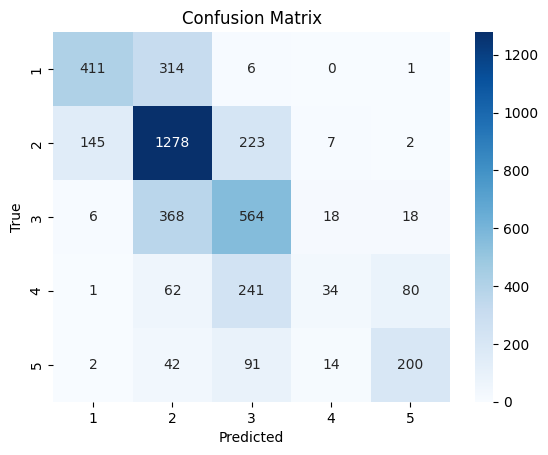

Random Forest Performance:
Accuracy: 0.729
Precision: 0.728
Recall: 0.729
F1 Score: 0.724
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       732
           2       0.74      0.85      0.79      1655
           3       0.65      0.66      0.65       974
           4       0.60      0.41      0.49       418
           5       0.79      0.65      0.72       349

    accuracy                           0.73      4128
   macro avg       0.72      0.67      0.69      4128
weighted avg       0.73      0.73      0.72      4128



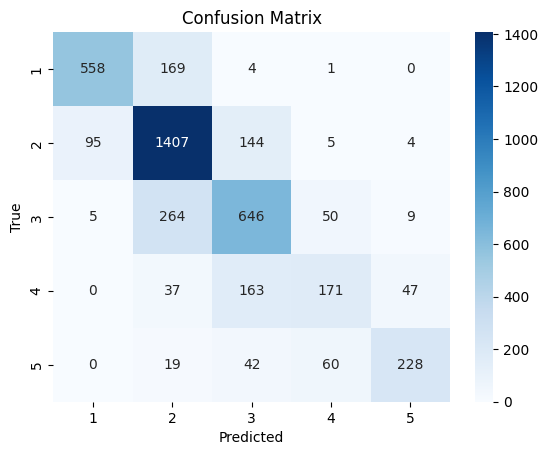

SVM Performance:
Accuracy: 0.642
Precision: 0.656
Recall: 0.642
F1 Score: 0.627
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.65      0.71       732
           2       0.67      0.80      0.73      1655
           3       0.51      0.63      0.56       974
           4       0.62      0.17      0.27       418
           5       0.79      0.46      0.58       349

    accuracy                           0.64      4128
   macro avg       0.67      0.54      0.57      4128
weighted avg       0.66      0.64      0.63      4128



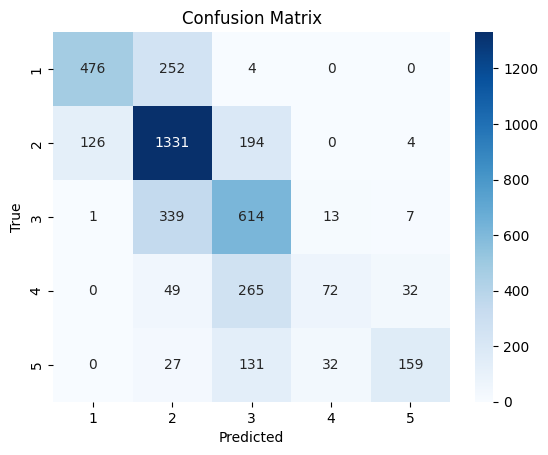

ANN Performance:
Accuracy: 0.7
Precision: 0.698
Recall: 0.7
F1 Score: 0.696
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.77      0.78       732
           2       0.73      0.81      0.76      1655
           3       0.61      0.63      0.62       974
           4       0.54      0.41      0.46       418
           5       0.79      0.60      0.68       349

    accuracy                           0.70      4128
   macro avg       0.69      0.64      0.66      4128
weighted avg       0.70      0.70      0.70      4128



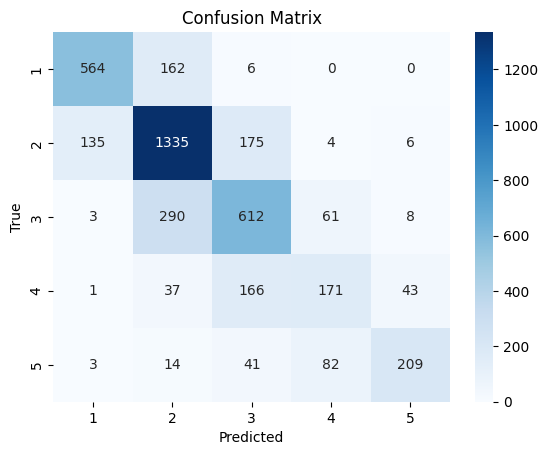

In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# === Feature / Target Split ===
X = df.drop(columns=['class'])
y = df['class']

# === Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# === Logistic Regression ===
log_model, log_preds = run_logistic_regression(X_train, X_test, y_train, y_test)
print("Logistic Regression Performance:")
evaluate_classification(y_test, log_preds)
plot_confusion(y_test, log_preds)

# === Random Forest ===
rf_model, rf_preds = run_random_forest(X_train, X_test, y_train, y_test)
print("Random Forest Performance:")
evaluate_classification(y_test, rf_preds)
plot_confusion(y_test, rf_preds)

# === Support Vector Machine ===
svm_model, svm_preds = run_svm(X_train, X_test, y_train, y_test)
print("SVM Performance:")
evaluate_classification(y_test, svm_preds)
plot_confusion(y_test, svm_preds)

# === Artificial Neural Network ===
ann_model, ann_preds = run_ann(X_train, X_test, y_train, y_test, hidden_layer_sizes=(64, 32, 16))
print("ANN Performance:")
evaluate_classification(y_test, ann_preds)
plot_confusion(y_test, ann_preds)


## Questions: 

### Train the models using X_train and y_train, present test accuracy using test data set X_test, y_test. Don't use test data during training.

### Q1) Assume you want to remove at least two features. Implement a linear regression model to do that, and describe the process. Present the accuracy on test-set, try to improve the accuracy as much as possible.

In [17]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# === Separate Features and Target ===
X = df.drop(columns=['class'])
y = df['class']

# === Optional: Only scale numeric features with large spread ===
# Let's say we want to scale f5 and f6 based on previous data description
columns_to_scale = ['f5', 'f6']
scaler = StandardScaler()
X_scaled_part = pd.DataFrame(scaler.fit_transform(X[columns_to_scale]), columns=columns_to_scale)
X_remaining = X.drop(columns=columns_to_scale)
X_processed = pd.concat([X_remaining.reset_index(drop=True), X_scaled_part.reset_index(drop=True)], axis=1)

# === Feature Selection: Remove at least two features ===
# Select top 6 features out of 8 using ANOVA F-score
X_selected = select_k_best(X_processed, y, k=6)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# === Train Linear Regression ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_continuous = lr_model.predict(X_test)

# === Convert Regression Output to Class Labels ===
y_pred_class = np.round(y_pred_continuous).astype(int)
y_pred_class = np.clip(y_pred_class, y.min(), y.max())  # Ensure class bounds

# === Evaluate Performance ===
print("Linear Regression Classifier Performance:")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_class), 3))
evaluate_classification(y_test, y_pred_class)


Selected features: ['f1', 'f2', 'f3', 'f7', 'f8', 'f5']
Linear Regression Classifier Performance:
Test Accuracy: 0.541
Accuracy: 0.541
Precision: 0.591
Recall: 0.541
F1 Score: 0.532
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.39      0.50       732
           2       0.59      0.60      0.60      1655
           3       0.44      0.73      0.55       974
           4       0.47      0.36      0.40       418
           5       0.97      0.25      0.40       349

    accuracy                           0.54      4128
   macro avg       0.63      0.47      0.49      4128
weighted avg       0.59      0.54      0.53      4128



### Q2) Train logistic regression, random forest, and support vector machine models. Present training and test accuracies. Try to figure out whether there is overfitting or underfitting.

In [19]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === Scale All Numerical Features ===
X_scaled = scale_features(X)

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# === LOGISTIC REGRESSION ===
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_train_acc = log_model.score(X_train, y_train)
log_test_acc = log_model.score(X_test, y_test)
print("\n=== Logistic Regression ===")
print(f"Train Accuracy: {log_train_acc:.3f}")
print(f"Test Accuracy:  {log_test_acc:.3f}")
evaluate_classification(y_test, log_model.predict(X_test))

# === RANDOM FOREST ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_acc = rf_model.score(X_train, y_train)
rf_test_acc = rf_model.score(X_test, y_test)
print("\n=== Random Forest ===")
print(f"Train Accuracy: {rf_train_acc:.3f}")
print(f"Test Accuracy:  {rf_test_acc:.3f}")
evaluate_classification(y_test, rf_model.predict(X_test))

# === SUPPORT VECTOR MACHINE ===
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_train_acc = svm_model.score(X_train, y_train)
svm_test_acc = svm_model.score(X_test, y_test)
print("\n=== Support Vector Machine ===")
print(f"Train Accuracy: {svm_train_acc:.3f}")
print(f"Test Accuracy:  {svm_test_acc:.3f}")
evaluate_classification(y_test, svm_model.predict(X_test))

# === Summary & Overfitting/Underfitting Check ===
print("\n=== Summary ===")
print(f"Logistic Regression   - Train: {log_train_acc:.3f}, Test: {log_test_acc:.3f}")
print(f"Random Forest         - Train: {rf_train_acc:.3f}, Test: {rf_test_acc:.3f}")
print(f"SVM                   - Train: {svm_train_acc:.3f}, Test: {svm_test_acc:.3f}")



=== Logistic Regression ===
Train Accuracy: 0.606
Test Accuracy:  0.602
Accuracy: 0.602
Precision: 0.599
Recall: 0.602
F1 Score: 0.581
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.56      0.63       732
           2       0.62      0.77      0.69      1655
           3       0.50      0.58      0.54       974
           4       0.47      0.08      0.14       418
           5       0.66      0.57      0.62       349

    accuracy                           0.60      4128
   macro avg       0.60      0.51      0.52      4128
weighted avg       0.60      0.60      0.58      4128


=== Random Forest ===
Train Accuracy: 1.000
Test Accuracy:  0.729
Accuracy: 0.729
Precision: 0.728
Recall: 0.729
F1 Score: 0.724
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       732
           2       0.74      0.85      0.79      1655
           3       0.65      0.66   


=== Logistic Regression ===
Train Accuracy: 0.606
Test Accuracy:  0.602
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.56      0.63       732
           2       0.62      0.77      0.69      1655
           3       0.50      0.58      0.54       974
           4       0.47      0.08      0.14       418
           5       0.66      0.57      0.62       349

    accuracy                           0.60      4128
   macro avg       0.60      0.51      0.52      4128
weighted avg       0.60      0.60      0.58      4128



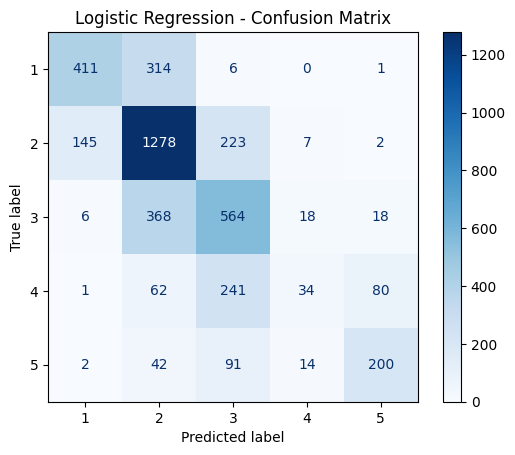

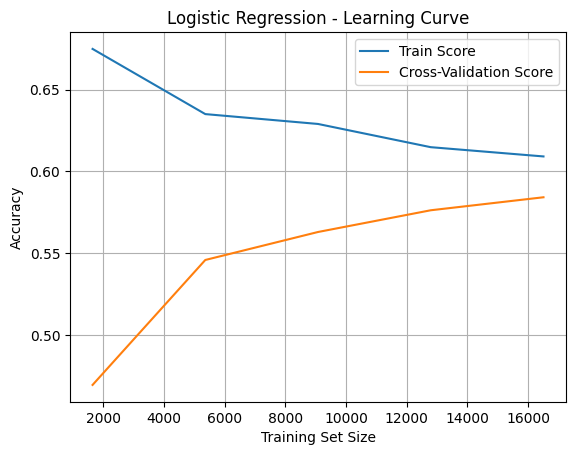


=== Random Forest ===
Train Accuracy: 1.000
Test Accuracy:  0.729
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       732
           2       0.74      0.85      0.79      1655
           3       0.65      0.66      0.65       974
           4       0.60      0.41      0.49       418
           5       0.79      0.65      0.72       349

    accuracy                           0.73      4128
   macro avg       0.72      0.67      0.69      4128
weighted avg       0.73      0.73      0.72      4128



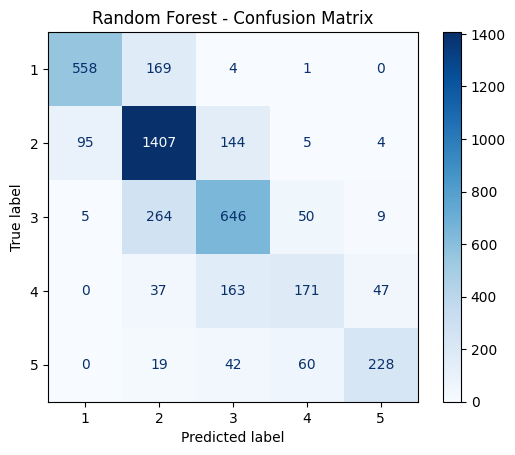

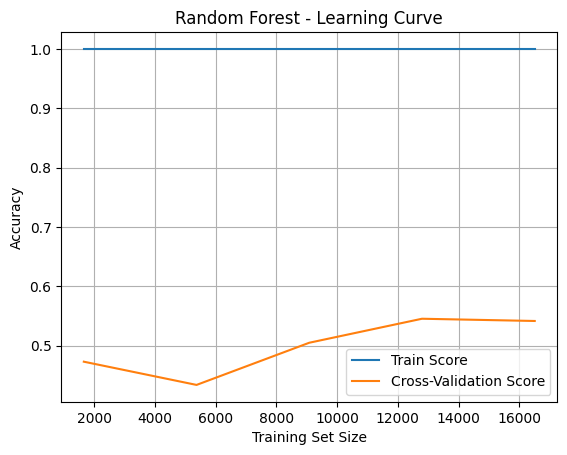


=== SVM ===
Train Accuracy: 0.656
Test Accuracy:  0.642
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.65      0.71       732
           2       0.67      0.80      0.73      1655
           3       0.51      0.63      0.56       974
           4       0.62      0.17      0.27       418
           5       0.79      0.46      0.58       349

    accuracy                           0.64      4128
   macro avg       0.67      0.54      0.57      4128
weighted avg       0.66      0.64      0.63      4128



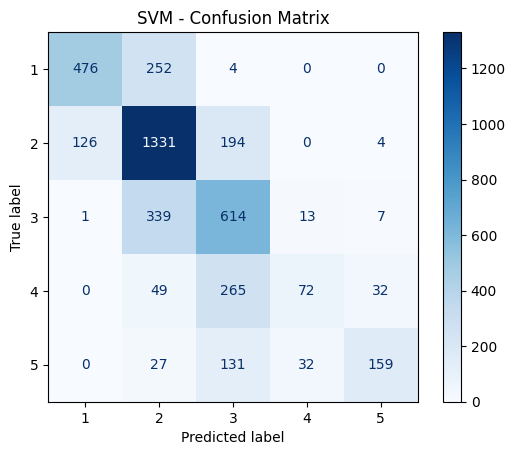

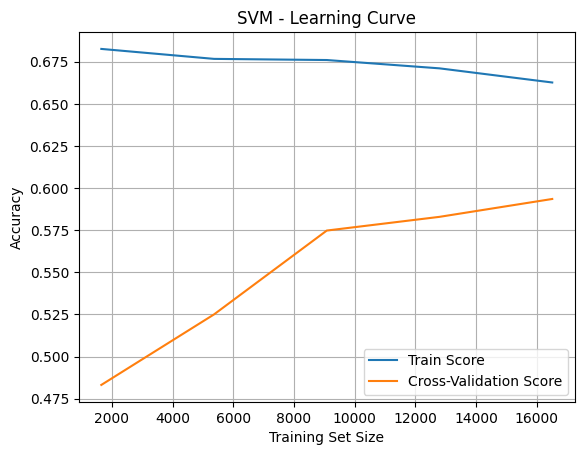


=== SVM Hyperparameter Tuning ===
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.609


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# === Scale Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# === Models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

# === Training, Evaluation, Confusion Matrix, and Learning Curve ===
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy:  {test_acc:.3f}")

    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Train Score')
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
    plt.title(f'{name} - Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# === Hyperparameter Tuning Example: SVM ===
print("\n=== SVM Hyperparameter Tuning ===")
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_scaled, y)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", round(grid.best_score_, 3))


### Q3) If the test accuracy of a model in Q2 is below 59%, define proper feature engineering and hyperparameter tuning processes to improve its accuracy. Present training and test accuracies. Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and give a brief discussion on it.

### Q4) Train a neural network model, which has at least 3 hidden layers. Give the classification accuracies on training and test sets.

=== Neural Network Classifier ===
Train Accuracy: 0.697
Test Accuracy:  0.686
\nClassification Report (Test):
              precision    recall  f1-score   support

           1       0.78      0.76      0.77       732
           2       0.72      0.79      0.75      1655
           3       0.59      0.65      0.62       974
           4       0.56      0.26      0.36       418
           5       0.68      0.66      0.67       349

    accuracy                           0.69      4128
   macro avg       0.67      0.62      0.63      4128
weighted avg       0.68      0.69      0.68      4128



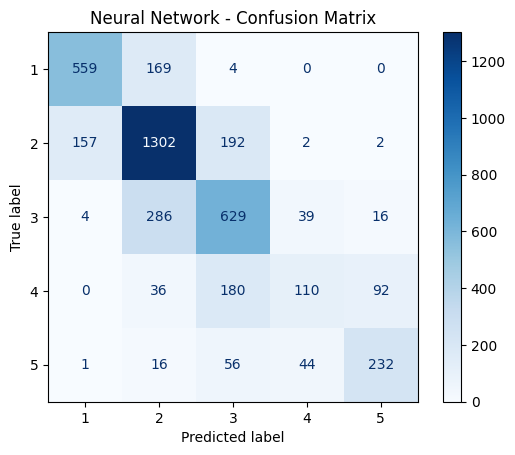

In [21]:
# Creating a complete script to train a neural network model (MLP) with at least 3 hidden layers
# and report training and test classification accuracy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# === Scale Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# === Train Neural Network with 3 Hidden Layers ===
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                      max_iter=500, random_state=42, early_stopping=True)

model.fit(X_train, y_train)

# === Predictions ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Accuracy Scores ===
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Neural Network Classifier ===")
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:  {test_acc:.3f}")

print("\\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title('Neural Network - Confusion Matrix')
plt.show()



### Q5) If the test accuracy in Q4 is below 67%, define proper feature engineering and hyperparameter tuning processes (or another modification) to improve the performance.  Plot loss curves. Try to figure out whether there is overfitting or underfitting.